# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import dill
import torch
import numpy as np

### Helper Functions

In [363]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    dist, value = policy_net(state)
    action_probs = dist.probs.data.numpy()[0]

    actions = list(zip(action_names, action_probs))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        action_names[int(np.argmax(action_probs))]
    ))


### Load Data

## Method Analysis

Number of games played: 173360


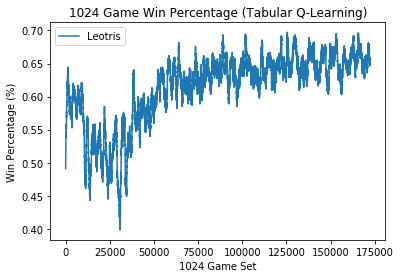

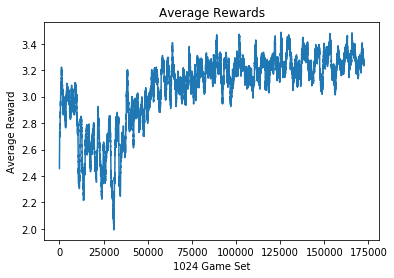

In [437]:
model_name = 'PPO'
winner_list = dill.load(open("results/winner_list_{}.pickle".format(model_name), "rb"))
reward_list = dill.load(open("results/reward_list_{}.pickle".format(model_name), "rb"))

batch_size = 1024
win_pcts = defaultdict(list)
avg_rewards = list()

creatures = ["Leotris"]

print("Number of games played: {}".format(len(winner_list)))

# Graph win percentage:
for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

# # Graph reward:
# for i in range(0, len(reward_list) - batch_size):
#     batch_reward_list = reward_list[i:(i+batch_size)]
#     avg_reward = np.mean(batch_reward_list)
#     avg_rewards.append(avg_reward)
    
# plt.plot(range(len(avg_rewards)), avg_rewards)
# plt.title("Average Rewards")
# plt.ylabel("Average Reward")
# plt.xlabel("{} Game Set".format(batch_size))
# plt.show()

## Scratch

In [439]:
# policy_net = dill.load(open("results/model_{}.pickle".format(model_name), "rb"))
state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.2, # x pos
    0.4, # y pos
    0.2, # enemy x
    0.3, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    -1, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.2, # x pos
    0.4, # y pos
    0.2, # enemy x
    0.3, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    -1, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.2, # x pos
    0.4, # y pos
    0.2, # enemy x
    0.3, # enemy y
    1.0, # attacks used
    0.0, # movement remaining
    -1, # number steps
]])

report_actions(state)
print()

end: 	6.778027799184613e-20
left: 	8.316378235849814e-19
right: 	2.2954987849334033e-18
up: 	6.860707002509514e-10
down: 	5.20575511586685e-08
shot: 	1.0
-----shot-----

end: 	0.0004660800623241812
left: 	8.799301383197973e-22
right: 	2.8713797818931074e-20
up: 	1.3895428210841665e-11
down: 	0.9995127320289612
shot: 	2.1185638615861535e-05
-----down-----

end: 	0.6761678457260132
left: 	3.2530687046237773e-20
right: 	6.998483581645242e-19
up: 	6.60896753990059e-11
down: 	0.3238316774368286
shot: 	4.776696300723415e-07
-----end-----

